In [6]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [8]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 1000)
        self.fc2 = nn.Linear(1000, 1000)
        self.fc3 = nn.Linear(1000, 2)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x)
    
net = Net()
learning_rate = 0.01
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
# create a loss function
criterion = nn.MSELoss()

In [9]:
# run the main training loop
for epoch in range(epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        # resize data from (batch_size, 1, 28, 28) to (batch_size, 28*28)
        data = data.view(-1, 28*28)
        optimizer.zero_grad()
        net_out = net(data)
        loss = criterion(net_out, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    epoch, batch_idx * len(data), len(train_loader.dataset),
                           100. * batch_idx / len(train_loader), loss.data[0]))
            
net_out = net(data)
loss = criterion(net_out, target)
loss.backward()
optimizer.step()

NameError: name 'epochs' is not defined

In [10]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

100.1%

Extracting ../MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ../MNIST/MNIST/raw


113.5%

Extracting ../MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ../MNIST/MNIST/raw


100.4%

Extracting ../MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ../MNIST/MNIST/raw


180.4%

Extracting ../MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../MNIST/MNIST/raw
Processing...
Done!
torch.Size([64, 1, 28, 28])
torch.Size([64])


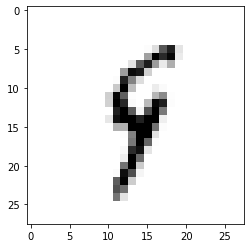

In [11]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

trainset = datasets.MNIST('../MNIST', download=True, train=True, transform=transform)
testset = datasets.MNIST('../MNIST', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, shuffle=True)
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');


In [26]:
input_size = 784
hidden_sizes = [1000, 1000]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))

print(model)

Sequential(
  (0): Linear(in_features=784, out_features=1000, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1000, out_features=1000, bias=True)
  (3): ReLU()
  (4): Linear(in_features=1000, out_features=10, bias=True)
  (5): LogSoftmax()
)


In [27]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss

In [28]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0008,  0.0008,  0.0008,  ...,  0.0008,  0.0008,  0.0008],
        [ 0.0007,  0.0007,  0.0007,  ...,  0.0007,  0.0007,  0.0007],
        ...,
        [-0.0008, -0.0008, -0.0008,  ..., -0.0008, -0.0008, -0.0008],
        [ 0.0003,  0.0003,  0.0003,  ...,  0.0003,  0.0003,  0.0003],
        [ 0.0003,  0.0003,  0.0003,  ...,  0.0003,  0.0003,  0.0003]])


In [30]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.5375965736361582
Epoch 1 - Training loss: 0.24917614320590933
Epoch 2 - Training loss: 0.185325778973128
Epoch 3 - Training loss: 0.1466017514010514
Epoch 4 - Training loss: 0.11996852148022415
Epoch 5 - Training loss: 0.1006405259361431
Epoch 6 - Training loss: 0.0862250672990897
Epoch 7 - Training loss: 0.07502640306707352
Epoch 8 - Training loss: 0.06684174279678366
Epoch 9 - Training loss: 0.058174592871735216
Epoch 10 - Training loss: 0.05161256093863469
Epoch 11 - Training loss: 0.04636356298591314
Epoch 12 - Training loss: 0.04130620861759604
Epoch 13 - Training loss: 0.037130003560955985
Epoch 14 - Training loss: 0.03254581052191389

Training Time (in minutes) = 7.837728838125865


In [ ]:

with torch.no_grad():
    for img_test, labels in testloader:
        # Flatten MNIST images into a 784 long vector
        img_test = img_test.view(img_test.shape[0], -1)
        logps = model(img_test)
        ps = torch.exp(logps)
        probab = list(ps.numpy())
        print(probab)
        print("Predicted Digit =", probab.index(max(probab)), max(probab))
        break

[array([4.9411040e-07, 9.9960250e-01, 2.3349854e-05, 4.3288743e-05,
       3.6382048e-06, 7.3591275e-07, 7.9945185e-06, 1.3533456e-04,
       1.8073671e-04, 1.9446181e-06], dtype=float32)]
Predicted Digit = 0 [4.9411040e-07 9.9960250e-01 2.3349854e-05 4.3288743e-05 3.6382048e-06
 7.3591275e-07 7.9945185e-06 1.3533456e-04 1.8073671e-04 1.9446181e-06]
[array([1.4888760e-06, 9.9931264e-01, 2.8000110e-05, 2.9075868e-06,
       9.6794220e-06, 1.5815988e-07, 1.2097784e-04, 4.4514811e-05,
       4.7940155e-04, 2.3171832e-07], dtype=float32)]
Predicted Digit = 0 [1.4888760e-06 9.9931264e-01 2.8000110e-05 2.9075868e-06 9.6794220e-06
 1.5815988e-07 1.2097784e-04 4.4514811e-05 4.7940155e-04 2.3171832e-07]
[array([9.9999940e-01, 1.9217460e-12, 8.9469268e-09, 1.7726997e-12,
       8.0220462e-11, 9.1047794e-11, 4.4180229e-07, 5.2135157e-08,
       4.6175726e-11, 1.7660221e-07], dtype=float32)]
Predicted Digit = 0 [9.9999940e-01 1.9217460e-12 8.9469268e-09 1.7726997e-12 8.0220462e-11
 9.1047794e-11 4

[array([2.4676921e-09, 1.4867482e-11, 1.9706005e-05, 1.3471740e-09,
       7.8923460e-07, 8.5086391e-09, 9.9997950e-01, 1.4585051e-09,
       1.7497722e-09, 5.5890698e-13], dtype=float32)]
Predicted Digit = 0 [2.4676921e-09 1.4867482e-11 1.9706005e-05 1.3471740e-09 7.8923460e-07
 8.5086391e-09 9.9997950e-01 1.4585051e-09 1.7497722e-09 5.5890698e-13]
[array([3.8871330e-11, 4.3420592e-09, 7.0732120e-10, 9.9995720e-01,
       4.6856616e-13, 4.2532753e-05, 2.7669681e-14, 2.7650876e-12,
       1.7549145e-07, 5.7774876e-08], dtype=float32)]
Predicted Digit = 0 [3.8871330e-11 4.3420592e-09 7.0732120e-10 9.9995720e-01 4.6856616e-13
 4.2532753e-05 2.7669681e-14 2.7650876e-12 1.7549145e-07 5.7774876e-08]
[array([1.0118974e-08, 4.9281716e-09, 1.1285287e-07, 1.9465290e-08,
       9.9974841e-01, 3.2418397e-09, 5.0561205e-08, 1.4687626e-04,
       4.3851594e-07, 1.0411670e-04], dtype=float32)]
Predicted Digit = 0 [1.0118974e-08 4.9281716e-09 1.1285287e-07 1.9465290e-08 9.9974841e-01
 3.2418397e-09 5

[array([8.0869000e-07, 4.7353558e-05, 1.2662882e-07, 9.9256223e-01,
       2.2427660e-09, 7.3445872e-03, 1.7084322e-07, 8.2921554e-09,
       2.1620885e-05, 2.3093782e-05], dtype=float32)]
Predicted Digit = 0 [8.0869000e-07 4.7353558e-05 1.2662882e-07 9.9256223e-01 2.2427660e-09
 7.3445872e-03 1.7084322e-07 8.2921554e-09 2.1620885e-05 2.3093782e-05]
[array([9.9974555e-01, 4.4043357e-08, 2.2567756e-04, 2.2889712e-05,
       4.3504922e-08, 5.1471454e-07, 4.0080031e-06, 1.2938509e-07,
       6.5993288e-07, 3.9471536e-07], dtype=float32)]
Predicted Digit = 0 [9.9974555e-01 4.4043357e-08 2.2567756e-04 2.2889712e-05 4.3504922e-08
 5.1471454e-07 4.0080031e-06 1.2938509e-07 6.5993288e-07 3.9471536e-07]
[array([1.8754100e-09, 1.9805595e-09, 1.0034179e-06, 4.1255521e-06,
       2.9902287e-12, 1.2495628e-11, 4.5442322e-15, 9.9999475e-01,
       2.2646142e-10, 7.3770003e-08], dtype=float32)]
Predicted Digit = 0 [1.8754100e-09 1.9805595e-09 1.0034179e-06 4.1255521e-06 2.9902287e-12
 1.2495628e-11 4

[array([1.0128065e-05, 7.3707697e-06, 5.6942697e-03, 9.9556037e-06,
       9.7599989e-01, 9.1521127e-07, 1.7080253e-02, 4.4455015e-04,
       2.9786412e-05, 7.2278688e-04], dtype=float32)]
Predicted Digit = 0 [1.0128065e-05 7.3707697e-06 5.6942697e-03 9.9556037e-06 9.7599989e-01
 9.1521127e-07 1.7080253e-02 4.4455015e-04 2.9786412e-05 7.2278688e-04]
[array([1.8232079e-11, 1.5220046e-12, 4.3936016e-13, 4.2021338e-08,
       7.0610726e-16, 1.0000000e+00, 3.0883575e-12, 7.5386695e-16,
       5.1158422e-10, 7.2567419e-09], dtype=float32)]
Predicted Digit = 0 [1.8232079e-11 1.5220046e-12 4.3936016e-13 4.2021338e-08 7.0610726e-16
 1.0000000e+00 3.0883575e-12 7.5386695e-16 5.1158422e-10 7.2567419e-09]
[array([1.3080742e-03, 1.0993098e-06, 4.5417252e-04, 1.0415741e-06,
       1.5987940e-04, 1.3443937e-04, 5.3141109e-04, 4.7621775e-06,
       9.9733585e-01, 6.9221082e-05], dtype=float32)]
Predicted Digit = 0 [1.3080742e-03 1.0993098e-06 4.5417252e-04 1.0415741e-06 1.5987940e-04
 1.3443937e-04 5

[array([1.5891273e-10, 4.4133353e-11, 9.8743174e-09, 1.2481974e-08,
       9.9995935e-01, 8.9143845e-07, 4.4999325e-08, 5.7394309e-06,
       1.1855631e-05, 2.2161743e-05], dtype=float32)]
Predicted Digit = 0 [1.5891273e-10 4.4133353e-11 9.8743174e-09 1.2481974e-08 9.9995935e-01
 8.9143845e-07 4.4999325e-08 5.7394309e-06 1.1855631e-05 2.2161743e-05]
[array([9.9997556e-01, 5.8708537e-12, 8.1002764e-07, 6.4575944e-12,
       5.9260492e-06, 2.1589685e-11, 1.5281928e-05, 4.7290396e-08,
       7.3046231e-09, 2.3571408e-06], dtype=float32)]
Predicted Digit = 0 [9.9997556e-01 5.8708537e-12 8.1002764e-07 6.4575944e-12 5.9260492e-06
 2.1589685e-11 1.5281928e-05 4.7290396e-08 7.3046231e-09 2.3571408e-06]
[array([2.1527466e-04, 4.9685419e-04, 2.7642458e-05, 1.0422787e-04,
       8.3864936e-05, 1.3655317e-01, 6.6492432e-01, 1.6173685e-06,
       1.9710407e-01, 4.8894197e-04], dtype=float32)]
Predicted Digit = 0 [2.1527466e-04 4.9685419e-04 2.7642458e-05 1.0422787e-04 8.3864936e-05
 1.3655317e-01 6

[array([1.0220947e-08, 9.9964094e-01, 3.5589114e-06, 4.4558578e-06,
       8.3086488e-06, 6.8618884e-09, 1.0006332e-06, 2.9630939e-04,
       4.5056291e-05, 3.3674073e-07], dtype=float32)]
Predicted Digit = 0 [1.0220947e-08 9.9964094e-01 3.5589114e-06 4.4558578e-06 8.3086488e-06
 6.8618884e-09 1.0006332e-06 2.9630939e-04 4.5056291e-05 3.3674073e-07]
[array([4.1375480e-07, 9.9653959e-01, 5.1207876e-06, 3.8322326e-04,
       2.8732220e-06, 1.6550223e-08, 1.2074057e-07, 1.6886502e-03,
       1.3772474e-03, 2.7575775e-06], dtype=float32)]
Predicted Digit = 0 [4.1375480e-07 9.9653959e-01 5.1207876e-06 3.8322326e-04 2.8732220e-06
 1.6550223e-08 1.2074057e-07 1.6886502e-03 1.3772474e-03 2.7575775e-06]
[array([9.99225497e-01, 2.97838960e-06, 4.05622879e-04, 4.81229436e-05,
       1.06454588e-10, 2.05784541e-04, 4.76373287e-07, 1.09370485e-04,
       8.23342177e-08, 2.00450518e-06], dtype=float32)]
Predicted Digit = 0 [9.99225497e-01 2.97838960e-06 4.05622879e-04 4.81229436e-05
 1.06454588e-10 

[array([3.29030797e-07, 6.86626436e-08, 7.91685650e-08, 1.07008475e-07,
       7.14302992e-11, 9.99978662e-01, 1.53304645e-05, 1.38432755e-11,
       5.40745850e-06, 2.36657609e-08], dtype=float32)]
Predicted Digit = 0 [3.29030797e-07 6.86626436e-08 7.91685650e-08 1.07008475e-07
 7.14302992e-11 9.99978662e-01 1.53304645e-05 1.38432755e-11
 5.40745850e-06 2.36657609e-08]
[array([2.3743189e-06, 5.8344494e-07, 2.1288697e-06, 4.8710499e-05,
       7.6709249e-08, 1.7414472e-05, 2.5409581e-05, 2.4684359e-09,
       9.9988997e-01, 1.3187636e-05], dtype=float32)]
Predicted Digit = 0 [2.3743189e-06 5.8344494e-07 2.1288697e-06 4.8710499e-05 7.6709249e-08
 1.7414472e-05 2.5409581e-05 2.4684359e-09 9.9988997e-01 1.3187636e-05]
[array([7.5913228e-08, 1.4817390e-07, 2.1935186e-08, 3.3834156e-05,
       2.8657007e-05, 1.2454757e-06, 1.2022786e-09, 2.1978649e-05,
       2.5239110e-06, 9.9991167e-01], dtype=float32)]
Predicted Digit = 0 [7.5913228e-08 1.4817390e-07 2.1935186e-08 3.3834156e-05 2.8657007

[array([2.3952025e-05, 5.5565664e-07, 1.3192446e-08, 1.1035271e-06,
       6.4215651e-06, 9.9988866e-01, 1.0999122e-05, 5.8794385e-06,
       6.2484469e-05, 1.4584586e-08], dtype=float32)]
Predicted Digit = 0 [2.3952025e-05 5.5565664e-07 1.3192446e-08 1.1035271e-06 6.4215651e-06
 9.9988866e-01 1.0999122e-05 5.8794385e-06 6.2484469e-05 1.4584586e-08]
[array([2.2683895e-07, 1.1351838e-08, 8.0217563e-07, 3.7193868e-07,
       1.0383646e-08, 2.0051866e-07, 1.0355920e-11, 9.9999404e-01,
       3.0456240e-09, 4.3871778e-06], dtype=float32)]
Predicted Digit = 0 [2.2683895e-07 1.1351838e-08 8.0217563e-07 3.7193868e-07 1.0383646e-08
 2.0051866e-07 1.0355920e-11 9.9999404e-01 3.0456240e-09 4.3871778e-06]
[array([2.3020522e-08, 1.0036278e-09, 3.3464028e-07, 1.0116562e-08,
       9.9997938e-01, 2.7461143e-08, 5.0929998e-07, 1.0473758e-05,
       5.3744216e-06, 3.9307733e-06], dtype=float32)]
Predicted Digit = 0 [2.3020522e-08 1.0036278e-09 3.3464028e-07 1.0116562e-08 9.9997938e-01
 2.7461143e-08 5

[array([9.9967074e-01, 1.8170668e-07, 2.6328606e-04, 7.4273753e-06,
       4.1340256e-09, 1.5149410e-06, 5.1808162e-05, 3.7182925e-08,
       4.8890442e-06, 1.9630976e-07], dtype=float32)]
Predicted Digit = 0 [9.9967074e-01 1.8170668e-07 2.6328606e-04 7.4273753e-06 4.1340256e-09
 1.5149410e-06 5.1808162e-05 3.7182925e-08 4.8890442e-06 1.9630976e-07]
[array([2.9125529e-09, 1.4899369e-10, 3.0094771e-08, 1.6341681e-09,
       9.9997747e-01, 2.1576987e-07, 8.8556760e-08, 2.8340178e-06,
       7.4651823e-08, 1.9156723e-05], dtype=float32)]
Predicted Digit = 0 [2.9125529e-09 1.4899369e-10 3.0094771e-08 1.6341681e-09 9.9997747e-01
 2.1576987e-07 8.8556760e-08 2.8340178e-06 7.4651823e-08 1.9156723e-05]
[array([9.9993598e-01, 6.2222756e-09, 2.8507549e-07, 5.5077904e-11,
       9.0469534e-09, 2.1511866e-08, 6.3595995e-05, 1.6507229e-07,
       4.4893124e-11, 3.5736790e-08], dtype=float32)]
Predicted Digit = 0 [9.9993598e-01 6.2222756e-09 2.8507549e-07 5.5077904e-11 9.0469534e-09
 2.1511866e-08 6

[array([1.1113822e-05, 2.4297631e-07, 1.0653647e-04, 3.6108683e-04,
       1.6584714e-06, 1.3905076e-06, 1.1067416e-06, 4.3980901e-08,
       9.9946600e-01, 5.0875486e-05], dtype=float32)]
Predicted Digit = 0 [1.1113822e-05 2.4297631e-07 1.0653647e-04 3.6108683e-04 1.6584714e-06
 1.3905076e-06 1.1067416e-06 4.3980901e-08 9.9946600e-01 5.0875486e-05]
[array([9.9195170e-01, 5.5899104e-06, 2.6206444e-05, 4.0091820e-07,
       1.9990148e-04, 5.4413089e-05, 3.0937544e-03, 4.5762751e-03,
       2.5975683e-07, 9.1467467e-05], dtype=float32)]
Predicted Digit = 0 [9.9195170e-01 5.5899104e-06 2.6206444e-05 4.0091820e-07 1.9990148e-04
 5.4413089e-05 3.0937544e-03 4.5762751e-03 2.5975683e-07 9.1467467e-05]
[array([3.3537176e-06, 6.0737563e-07, 7.1807815e-05, 7.6329492e-08,
       4.0078769e-04, 1.7799590e-06, 9.9952042e-01, 9.2425086e-07,
       1.7863334e-07, 4.2476305e-08], dtype=float32)]
Predicted Digit = 0 [3.3537176e-06 6.0737563e-07 7.1807815e-05 7.6329492e-08 4.0078769e-04
 1.7799590e-06 9

[array([2.6027251e-06, 1.5312265e-06, 3.0533457e-07, 2.0761919e-04,
       2.1491637e-07, 9.9971455e-01, 9.9524805e-06, 1.5256816e-08,
       6.2605613e-05, 5.8925485e-07], dtype=float32)]
Predicted Digit = 0 [2.6027251e-06 1.5312265e-06 3.0533457e-07 2.0761919e-04 2.1491637e-07
 9.9971455e-01 9.9524805e-06 1.5256816e-08 6.2605613e-05 5.8925485e-07]
[array([9.9999917e-01, 1.8411393e-10, 2.4504740e-07, 5.7197070e-11,
       5.1193679e-13, 2.7286807e-08, 5.5272551e-07, 1.5053120e-08,
       2.0798547e-11, 1.5348924e-09], dtype=float32)]
Predicted Digit = 0 [9.9999917e-01 1.8411393e-10 2.4504740e-07 5.7197070e-11 5.1193679e-13
 2.7286807e-08 5.5272551e-07 1.5053120e-08 2.0798547e-11 1.5348924e-09]
[array([2.4831088e-08, 1.2676464e-05, 4.6480767e-05, 6.4536133e-03,
       1.5522474e-04, 8.2733050e-06, 5.6247682e-09, 5.5095751e-04,
       1.4538531e-05, 9.9275815e-01], dtype=float32)]
Predicted Digit = 0 [2.4831088e-08 1.2676464e-05 4.6480767e-05 6.4536133e-03 1.5522474e-04
 8.2733050e-06 5

[array([3.6020461e-07, 3.3849112e-08, 4.2428026e-09, 9.9985564e-01,
       4.2641186e-11, 9.0375637e-05, 1.7362398e-11, 2.0768243e-09,
       1.4216110e-05, 3.9387156e-05], dtype=float32)]
Predicted Digit = 0 [3.6020461e-07 3.3849112e-08 4.2428026e-09 9.9985564e-01 4.2641186e-11
 9.0375637e-05 1.7362398e-11 2.0768243e-09 1.4216110e-05 3.9387156e-05]
[array([3.2688182e-05, 6.7124034e-08, 4.8065996e-08, 3.7373879e-03,
       6.3625528e-11, 9.9463379e-01, 9.5740953e-09, 1.5973825e-08,
       1.4403253e-06, 1.5946081e-03], dtype=float32)]
Predicted Digit = 0 [3.2688182e-05 6.7124034e-08 4.8065996e-08 3.7373879e-03 6.3625528e-11
 9.9463379e-01 9.5740953e-09 1.5973825e-08 1.4403253e-06 1.5946081e-03]
[array([2.4884415e-07, 9.9987233e-01, 8.3982428e-05, 7.0701748e-07,
       4.3936884e-06, 1.5850354e-09, 1.0292244e-06, 1.9322424e-05,
       1.7889504e-05, 8.1844265e-09], dtype=float32)]
Predicted Digit = 0 [2.4884415e-07 9.9987233e-01 8.3982428e-05 7.0701748e-07 4.3936884e-06
 1.5850354e-09 1

[array([6.2099653e-10, 8.4100401e-07, 5.4615711e-08, 9.9996698e-01,
       2.6272814e-12, 3.1848816e-05, 2.0166824e-12, 8.5079371e-10,
       1.2219130e-09, 3.2599672e-07], dtype=float32)]
Predicted Digit = 0 [6.2099653e-10 8.4100401e-07 5.4615711e-08 9.9996698e-01 2.6272814e-12
 3.1848816e-05 2.0166824e-12 8.5079371e-10 1.2219130e-09 3.2599672e-07]
[array([1.08503271e-03, 2.11284856e-08, 5.08483652e-07, 3.36398398e-06,
       1.87992714e-06, 3.60376970e-03, 1.00808556e-07, 9.94264066e-01,
       2.60920660e-06, 1.03866437e-03], dtype=float32)]
Predicted Digit = 0 [1.08503271e-03 2.11284856e-08 5.08483652e-07 3.36398398e-06
 1.87992714e-06 3.60376970e-03 1.00808556e-07 9.94264066e-01
 2.60920660e-06 1.03866437e-03]
[array([4.2921155e-07, 2.7298559e-09, 7.8361717e-07, 1.1230479e-05,
       2.1479178e-09, 1.9662679e-07, 3.3327237e-09, 4.6661458e-10,
       9.9997687e-01, 1.0366377e-05], dtype=float32)]
Predicted Digit = 0 [4.2921155e-07 2.7298559e-09 7.8361717e-07 1.1230479e-05 2.1479178

[array([9.9980313e-01, 3.9652804e-08, 2.0723413e-05, 3.4180167e-07,
       3.0695111e-09, 1.3385115e-04, 6.3137020e-07, 3.7203590e-05,
       1.7090743e-07, 3.9972729e-06], dtype=float32)]
Predicted Digit = 0 [9.9980313e-01 3.9652804e-08 2.0723413e-05 3.4180167e-07 3.0695111e-09
 1.3385115e-04 6.3137020e-07 3.7203590e-05 1.7090743e-07 3.9972729e-06]
[array([3.4517516e-08, 3.1174268e-09, 5.0830278e-09, 2.7487908e-07,
       1.5940880e-04, 2.1213134e-05, 8.4919684e-06, 2.6928544e-09,
       9.9980623e-01, 4.5029551e-06], dtype=float32)]
Predicted Digit = 0 [3.4517516e-08 3.1174268e-09 5.0830278e-09 2.7487908e-07 1.5940880e-04
 2.1213134e-05 8.4919684e-06 2.6928544e-09 9.9980623e-01 4.5029551e-06]
[array([4.9166471e-07, 2.8727916e-08, 2.2222417e-09, 2.8580079e-08,
       1.9047917e-08, 9.9997747e-01, 2.9815268e-08, 1.0491033e-07,
       2.0280862e-05, 1.5815182e-06], dtype=float32)]
Predicted Digit = 0 [4.9166471e-07 2.8727916e-08 2.2222417e-09 2.8580079e-08 1.9047917e-08
 9.9997747e-01 2

[array([6.5250783e-10, 8.4360988e-07, 1.3380021e-06, 2.1834235e-06,
       1.4775556e-10, 1.5509005e-10, 8.8839695e-14, 9.9999559e-01,
       9.7302173e-11, 6.1758001e-08], dtype=float32)]
Predicted Digit = 0 [6.5250783e-10 8.4360988e-07 1.3380021e-06 2.1834235e-06 1.4775556e-10
 1.5509005e-10 8.8839695e-14 9.9999559e-01 9.7302173e-11 6.1758001e-08]
[array([1.2430561e-06, 6.9493294e-06, 1.0998225e-06, 9.9796319e-01,
       4.7813670e-10, 2.5513570e-04, 6.2006505e-10, 1.4247748e-07,
       3.0811785e-05, 1.7414754e-03], dtype=float32)]
Predicted Digit = 0 [1.2430561e-06 6.9493294e-06 1.0998225e-06 9.9796319e-01 4.7813670e-10
 2.5513570e-04 6.2006505e-10 1.4247748e-07 3.0811785e-05 1.7414754e-03]
[array([4.55951152e-08, 9.99463618e-01, 2.33604769e-05, 4.57755368e-06,
       4.86947065e-05, 4.02548778e-07, 4.54038900e-06, 4.28329979e-04,
       2.63833590e-05, 1.01531406e-07], dtype=float32)]
Predicted Digit = 0 [4.55951152e-08 9.99463618e-01 2.33604769e-05 4.57755368e-06
 4.86947065e-05 

[array([1.7112393e-08, 6.7307337e-07, 9.9958533e-01, 4.0843966e-04,
       3.3700714e-14, 1.9167501e-11, 2.6778432e-12, 1.0900129e-07,
       5.3344793e-06, 2.6064444e-11], dtype=float32)]
Predicted Digit = 0 [1.7112393e-08 6.7307337e-07 9.9958533e-01 4.0843966e-04 3.3700714e-14
 1.9167501e-11 2.6778432e-12 1.0900129e-07 5.3344793e-06 2.6064444e-11]
[array([1.0991672e-08, 6.9087589e-09, 1.6044821e-06, 1.6469356e-08,
       9.9997485e-01, 1.4376265e-07, 3.6955123e-06, 3.0092676e-06,
       2.2959989e-06, 1.4475996e-05], dtype=float32)]
Predicted Digit = 0 [1.0991672e-08 6.9087589e-09 1.6044821e-06 1.6469356e-08 9.9997485e-01
 1.4376265e-07 3.6955123e-06 3.0092676e-06 2.2959989e-06 1.4475996e-05]
[array([3.5006925e-10, 5.1223577e-07, 9.9999869e-01, 4.7291999e-07,
       4.4295080e-12, 5.0245555e-13, 5.1590793e-12, 4.7981885e-09,
       3.1067395e-07, 1.2060319e-12], dtype=float32)]
Predicted Digit = 0 [3.5006925e-10 5.1223577e-07 9.9999869e-01 4.7291999e-07 4.4295080e-12
 5.0245555e-13 5

[array([9.9999452e-01, 2.9429448e-11, 3.9914976e-06, 4.9060569e-09,
       2.5954175e-10, 1.8429673e-09, 1.2622570e-06, 2.6726017e-09,
       1.8630857e-08, 2.3971378e-07], dtype=float32)]
Predicted Digit = 0 [9.9999452e-01 2.9429448e-11 3.9914976e-06 4.9060569e-09 2.5954175e-10
 1.8429673e-09 1.2622570e-06 2.6726017e-09 1.8630857e-08 2.3971378e-07]
[array([2.5600789e-03, 1.0061422e-03, 3.2784683e-05, 7.2878684e-05,
       6.4924017e-05, 8.4318262e-01, 2.9352724e-03, 4.6663047e-04,
       1.4967699e-01, 1.7893642e-06], dtype=float32)]
Predicted Digit = 0 [2.5600789e-03 1.0061422e-03 3.2784683e-05 7.2878684e-05 6.4924017e-05
 8.4318262e-01 2.9352724e-03 4.6663047e-04 1.4967699e-01 1.7893642e-06]
[array([2.3863843e-06, 2.7041137e-03, 9.4347386e-05, 2.1022828e-03,
       1.8275968e-07, 1.0045635e-07, 6.2247535e-10, 9.9414080e-01,
       4.0864670e-05, 9.1487233e-04], dtype=float32)]
Predicted Digit = 0 [2.3863843e-06 2.7041137e-03 9.4347386e-05 2.1022828e-03 1.8275968e-07
 1.0045635e-07 6

[array([5.12318765e-09, 2.38569828e-05, 9.99968290e-01, 6.73485965e-06,
       9.75278343e-13, 5.22820842e-10, 1.02412026e-08, 1.87630445e-09,
       1.19898391e-06, 1.88751399e-13], dtype=float32)]
Predicted Digit = 0 [5.12318765e-09 2.38569828e-05 9.99968290e-01 6.73485965e-06
 9.75278343e-13 5.22820842e-10 1.02412026e-08 1.87630445e-09
 1.19898391e-06 1.88751399e-13]
[array([8.3073530e-07, 4.9272693e-09, 2.2450686e-09, 8.6960827e-05,
       1.7500960e-09, 9.9981946e-01, 1.2331115e-07, 3.7961158e-08,
       4.1775618e-07, 9.2276336e-05], dtype=float32)]
Predicted Digit = 0 [8.3073530e-07 4.9272693e-09 2.2450686e-09 8.6960827e-05 1.7500960e-09
 9.9981946e-01 1.2331115e-07 3.7961158e-08 4.1775618e-07 9.2276336e-05]
[array([1.5350073e-08, 4.1860626e-06, 3.6206352e-08, 7.6627693e-05,
       8.8947934e-05, 4.7157917e-02, 3.0535756e-07, 2.4330304e-05,
       3.0628324e-02, 9.2201936e-01], dtype=float32)]
Predicted Digit = 0 [1.5350073e-08 4.1860626e-06 3.6206352e-08 7.6627693e-05 8.8947934

[array([5.5426153e-09, 1.6846569e-05, 1.6680713e-04, 9.0415897e-03,
       1.6354359e-05, 2.6135510e-07, 2.8408109e-09, 9.8741841e-01,
       3.6159992e-07, 3.3394247e-03], dtype=float32)]
Predicted Digit = 0 [5.5426153e-09 1.6846569e-05 1.6680713e-04 9.0415897e-03 1.6354359e-05
 2.6135510e-07 2.8408109e-09 9.8741841e-01 3.6159992e-07 3.3394247e-03]
[array([8.3077055e-08, 1.2781113e-07, 6.6314748e-10, 4.1535159e-07,
       1.0425872e-09, 9.9999547e-01, 4.5530735e-11, 3.6430743e-07,
       3.5271905e-06, 1.0020670e-09], dtype=float32)]
Predicted Digit = 0 [8.3077055e-08 1.2781113e-07 6.6314748e-10 4.1535159e-07 1.0425872e-09
 9.9999547e-01 4.5530735e-11 3.6430743e-07 3.5271905e-06 1.0020670e-09]
[array([1.0584554e-07, 9.9974746e-01, 3.5190948e-05, 8.3948271e-06,
       5.4162688e-06, 1.7901485e-07, 1.2583231e-06, 1.8484039e-04,
       1.6778202e-05, 3.4451202e-07], dtype=float32)]
Predicted Digit = 0 [1.0584554e-07 9.9974746e-01 3.5190948e-05 8.3948271e-06 5.4162688e-06
 1.7901485e-07 1

Predicted Digit = 0 [7.4332672e-07 1.1160167e-06 4.1892818e-06 5.4494927e-07 5.0252206e-06
 2.8296158e-06 9.9997449e-01 1.3671864e-07 1.0604580e-05 3.3307126e-07]
[array([9.99962568e-01, 2.80223310e-11, 3.58985490e-05, 1.10933787e-08,
       1.49367005e-10, 1.48144219e-09, 2.78344938e-08, 1.18730206e-07,
       4.44037838e-08, 1.47319543e-06], dtype=float32)]
Predicted Digit = 0 [9.99962568e-01 2.80223310e-11 3.58985490e-05 1.10933787e-08
 1.49367005e-10 1.48144219e-09 2.78344938e-08 1.18730206e-07
 4.44037838e-08 1.47319543e-06]
[array([1.9003836e-07, 2.2025395e-09, 4.9291330e-08, 2.1506823e-03,
       1.0152791e-11, 9.9719882e-01, 4.2138197e-08, 6.9664448e-11,
       4.2058408e-04, 2.2970195e-04], dtype=float32)]
Predicted Digit = 0 [1.9003836e-07 2.2025395e-09 4.9291330e-08 2.1506823e-03 1.0152791e-11
 9.9719882e-01 4.2138197e-08 6.9664448e-11 4.2058408e-04 2.2970195e-04]
[array([3.1939791e-09, 1.7416828e-07, 3.7462957e-09, 1.7209584e-05,
       2.0590282e-05, 9.8823068e-07, 5.03380

[array([2.2832097e-08, 6.8992158e-06, 9.9998176e-01, 1.0496016e-05,
       1.7743207e-15, 5.7986754e-11, 1.8155180e-11, 3.2434647e-10,
       7.9305005e-07, 8.2280747e-14], dtype=float32)]
Predicted Digit = 0 [2.2832097e-08 6.8992158e-06 9.9998176e-01 1.0496016e-05 1.7743207e-15
 5.7986754e-11 1.8155180e-11 3.2434647e-10 7.9305005e-07 8.2280747e-14]
[array([2.4489100e-06, 3.0592159e-07, 7.0696018e-07, 2.0645889e-03,
       7.8926545e-09, 6.8618561e-07, 2.2059031e-07, 3.1833600e-09,
       9.9791676e-01, 1.4194502e-05], dtype=float32)]
Predicted Digit = 0 [2.4489100e-06 3.0592159e-07 7.0696018e-07 2.0645889e-03 7.8926545e-09
 6.8618561e-07 2.2059031e-07 3.1833600e-09 9.9791676e-01 1.4194502e-05]
[array([4.5730459e-08, 2.8638482e-07, 7.6108337e-09, 3.5508310e-05,
       2.9288993e-08, 9.9970394e-01, 1.6638408e-11, 2.4370934e-04,
       1.5399966e-05, 1.0836845e-06], dtype=float32)]
Predicted Digit = 0 [4.5730459e-08 2.8638482e-07 7.6108337e-09 3.5508310e-05 2.9288993e-08
 9.9970394e-01 1

[array([8.7223989e-06, 7.3040777e-04, 2.3974557e-05, 8.8475704e-01,
       9.0217654e-06, 2.7310334e-03, 1.7710990e-07, 8.4237918e-02,
       5.6711524e-06, 2.7495949e-02], dtype=float32)]
Predicted Digit = 0 [8.7223989e-06 7.3040777e-04 2.3974557e-05 8.8475704e-01 9.0217654e-06
 2.7310334e-03 1.7710990e-07 8.4237918e-02 5.6711524e-06 2.7495949e-02]
[array([1.2381503e-07, 1.0078050e-05, 1.0894803e-06, 1.1333531e-05,
       8.0193626e-05, 8.6712796e-05, 5.3973448e-08, 4.0107520e-06,
       9.9980301e-01, 3.3636022e-06], dtype=float32)]
Predicted Digit = 0 [1.2381503e-07 1.0078050e-05 1.0894803e-06 1.1333531e-05 8.0193626e-05
 8.6712796e-05 5.3973448e-08 4.0107520e-06 9.9980301e-01 3.3636022e-06]
[array([4.0222737e-08, 1.2805594e-08, 3.3349272e-07, 6.3480652e-06,
       2.5550311e-04, 4.6274308e-05, 6.5461552e-07, 1.8875109e-05,
       3.4914579e-04, 9.9932301e-01], dtype=float32)]
Predicted Digit = 0 [4.0222737e-08 1.2805594e-08 3.3349272e-07 6.3480652e-06 2.5550311e-04
 4.6274308e-05 6

[array([6.5807789e-08, 5.0756915e-10, 8.1681648e-08, 2.5975363e-05,
       1.7946142e-04, 1.1995427e-05, 1.0633320e-07, 9.1502325e-06,
       1.0607392e-05, 9.9976236e-01], dtype=float32)]
Predicted Digit = 0 [6.5807789e-08 5.0756915e-10 8.1681648e-08 2.5975363e-05 1.7946142e-04
 1.1995427e-05 1.0633320e-07 9.1502325e-06 1.0607392e-05 9.9976236e-01]
[array([3.4577861e-05, 4.8404472e-06, 1.0553111e-06, 9.5396626e-07,
       5.6767153e-06, 5.5544920e-02, 9.4366723e-01, 1.3658120e-10,
       7.4073853e-04, 2.3578442e-08], dtype=float32)]
Predicted Digit = 0 [3.4577861e-05 4.8404472e-06 1.0553111e-06 9.5396626e-07 5.6767153e-06
 5.5544920e-02 9.4366723e-01 1.3658120e-10 7.4073853e-04 2.3578442e-08]
[array([2.6785843e-08, 8.2803447e-10, 1.9328754e-06, 3.1355822e-07,
       9.4902752e-10, 1.2145780e-08, 4.6420585e-08, 4.2772048e-09,
       9.9999762e-01, 7.0733677e-08], dtype=float32)]
Predicted Digit = 0 [2.6785843e-08 8.2803447e-10 1.9328754e-06 3.1355822e-07 9.4902752e-10
 1.2145780e-08 4

[array([1.6485416e-08, 1.3499695e-06, 1.7737865e-07, 9.9994159e-01,
       2.1550653e-10, 4.5686633e-05, 3.2764985e-11, 1.2985649e-10,
       8.5960446e-06, 2.5644269e-06], dtype=float32)]
Predicted Digit = 0 [1.6485416e-08 1.3499695e-06 1.7737865e-07 9.9994159e-01 2.1550653e-10
 4.5686633e-05 3.2764985e-11 1.2985649e-10 8.5960446e-06 2.5644269e-06]
[array([1.11781475e-04, 5.30887519e-06, 4.02671094e-06, 1.04997007e-05,
       6.81454048e-06, 9.99427199e-01, 9.77539457e-05, 7.45957095e-07,
       3.34722514e-04, 1.23861616e-06], dtype=float32)]
Predicted Digit = 0 [1.11781475e-04 5.30887519e-06 4.02671094e-06 1.04997007e-05
 6.81454048e-06 9.99427199e-01 9.77539457e-05 7.45957095e-07
 3.34722514e-04 1.23861616e-06]
[array([3.6628440e-09, 3.1676141e-08, 1.7642006e-11, 8.8017068e-06,
       6.1046372e-13, 9.9998164e-01, 5.8692393e-09, 5.3198721e-12,
       3.4068412e-07, 9.1289994e-06], dtype=float32)]
Predicted Digit = 0 [3.6628440e-09 3.1676141e-08 1.7642006e-11 8.8017068e-06 6.1046372

[array([5.84476290e-09, 9.99851942e-01, 1.30930539e-06, 6.03644730e-05,
       5.25940914e-06, 9.03127329e-07, 3.36800304e-06, 6.04819106e-05,
       1.32442765e-05, 3.24858524e-06], dtype=float32)]
Predicted Digit = 0 [5.84476290e-09 9.99851942e-01 1.30930539e-06 6.03644730e-05
 5.25940914e-06 9.03127329e-07 3.36800304e-06 6.04819106e-05
 1.32442765e-05 3.24858524e-06]
[array([1.6741989e-08, 9.6850193e-01, 5.7211648e-05, 7.7280711e-05,
       3.5962337e-03, 6.1640116e-05, 2.7055068e-02, 5.8846949e-06,
       6.4448116e-04, 1.9736210e-07], dtype=float32)]
Predicted Digit = 0 [1.6741989e-08 9.6850193e-01 5.7211648e-05 7.7280711e-05 3.5962337e-03
 6.1640116e-05 2.7055068e-02 5.8846949e-06 6.4448116e-04 1.9736210e-07]
[array([8.81924620e-07, 9.21072996e-08, 9.99219418e-01, 7.74761895e-04,
       6.15652652e-07, 2.18591424e-07, 1.18923985e-07, 3.42763315e-07,
       3.47671153e-06, 3.48108067e-08], dtype=float32)]
Predicted Digit = 0 [8.81924620e-07 9.21072996e-08 9.99219418e-01 7.74761895

[array([5.77153436e-10, 5.59341107e-09, 2.60945132e-09, 9.99997497e-01,
       3.48110374e-10, 1.23622533e-06, 2.54482552e-13, 3.56113183e-08,
       1.18187046e-07, 1.19414210e-06], dtype=float32)]
Predicted Digit = 0 [5.77153436e-10 5.59341107e-09 2.60945132e-09 9.99997497e-01
 3.48110374e-10 1.23622533e-06 2.54482552e-13 3.56113183e-08
 1.18187046e-07 1.19414210e-06]
[array([3.7314201e-09, 6.0992909e-07, 7.4877278e-08, 3.4994301e-03,
       8.3124178e-05, 1.2331945e-04, 9.7171049e-11, 1.3495449e-03,
       1.3960764e-04, 9.9480420e-01], dtype=float32)]
Predicted Digit = 0 [3.7314201e-09 6.0992909e-07 7.4877278e-08 3.4994301e-03 8.3124178e-05
 1.2331945e-04 9.7171049e-11 1.3495449e-03 1.3960764e-04 9.9480420e-01]
[array([5.9630660e-05, 9.9659389e-01, 3.6063462e-05, 5.7132151e-05,
       4.7044300e-06, 1.3348389e-04, 7.2487360e-06, 1.1590736e-03,
       1.9372622e-03, 1.1403091e-05], dtype=float32)]
Predicted Digit = 0 [5.9630660e-05 9.9659389e-01 3.6063462e-05 5.7132151e-05 4.7044300

[array([1.2432576e-08, 9.9960738e-01, 1.4877151e-06, 8.2123979e-06,
       2.4708832e-05, 4.9355089e-09, 7.2561917e-08, 3.5230472e-04,
       5.7206489e-06, 1.6303949e-07], dtype=float32)]
Predicted Digit = 0 [1.2432576e-08 9.9960738e-01 1.4877151e-06 8.2123979e-06 2.4708832e-05
 4.9355089e-09 7.2561917e-08 3.5230472e-04 5.7206489e-06 1.6303949e-07]
[array([3.8678213e-08, 4.2084562e-07, 2.3522522e-04, 1.0031472e-04,
       4.6660367e-11, 5.2011151e-10, 4.3068491e-12, 9.9966323e-01,
       2.7254181e-09, 7.1046526e-07], dtype=float32)]
Predicted Digit = 0 [3.8678213e-08 4.2084562e-07 2.3522522e-04 1.0031472e-04 4.6660367e-11
 5.2011151e-10 4.3068491e-12 9.9966323e-01 2.7254181e-09 7.1046526e-07]
[array([5.2799987e-10, 9.9981493e-01, 2.1898693e-06, 1.2740456e-05,
       1.3864801e-05, 8.8240789e-08, 1.1233922e-06, 1.3935530e-04,
       1.4250588e-05, 1.5393981e-06], dtype=float32)]
Predicted Digit = 0 [5.2799987e-10 9.9981493e-01 2.1898693e-06 1.2740456e-05 1.3864801e-05
 8.8240789e-08 1

[array([1.6743658e-07, 1.1667073e-09, 1.5919086e-07, 4.1197609e-06,
       3.9212074e-04, 9.1616128e-09, 2.5719471e-09, 4.3598397e-05,
       1.9032357e-06, 9.9955791e-01], dtype=float32)]
Predicted Digit = 0 [1.6743658e-07 1.1667073e-09 1.5919086e-07 4.1197609e-06 3.9212074e-04
 9.1616128e-09 2.5719471e-09 4.3598397e-05 1.9032357e-06 9.9955791e-01]
[array([7.5679175e-08, 4.0706109e-08, 2.6954984e-07, 1.0909328e-06,
       2.3309303e-08, 1.2195541e-02, 8.8902060e-03, 1.7688132e-11,
       9.7891265e-01, 2.4961687e-07], dtype=float32)]
Predicted Digit = 0 [7.5679175e-08 4.0706109e-08 2.6954984e-07 1.0909328e-06 2.3309303e-08
 1.2195541e-02 8.8902060e-03 1.7688132e-11 9.7891265e-01 2.4961687e-07]
[array([1.26137836e-10, 2.29215146e-07, 4.17469255e-06, 1.69539417e-05,
       9.99883175e-01, 3.00602242e-05, 1.17823994e-07, 5.03784293e-07,
       6.48236937e-06, 5.83511173e-05], dtype=float32)]
Predicted Digit = 0 [1.26137836e-10 2.29215146e-07 4.17469255e-06 1.69539417e-05
 9.99883175e-01 

[array([5.7303615e-12, 9.8967731e-13, 9.6448186e-14, 9.7942154e-07,
       1.9759888e-14, 9.9999893e-01, 4.3042622e-12, 1.2776571e-14,
       9.1734336e-09, 1.3800016e-07], dtype=float32)]
Predicted Digit = 0 [5.7303615e-12 9.8967731e-13 9.6448186e-14 9.7942154e-07 1.9759888e-14
 9.9999893e-01 4.3042622e-12 1.2776571e-14 9.1734336e-09 1.3800016e-07]
[array([6.5076474e-06, 3.3099496e-09, 7.9889440e-05, 1.1070367e-05,
       3.1570674e-10, 2.2193858e-06, 1.7756493e-06, 5.2021494e-09,
       9.9988031e-01, 1.8074214e-05], dtype=float32)]
Predicted Digit = 0 [6.5076474e-06 3.3099496e-09 7.9889440e-05 1.1070367e-05 3.1570674e-10
 2.2193858e-06 1.7756493e-06 5.2021494e-09 9.9988031e-01 1.8074214e-05]
[array([4.3762351e-11, 2.8587385e-08, 2.4767313e-09, 9.9999845e-01,
       2.7293234e-10, 5.8944761e-07, 9.5130240e-13, 1.8817710e-08,
       3.7619523e-07, 5.5200803e-07], dtype=float32)]
Predicted Digit = 0 [4.3762351e-11 2.8587385e-08 2.4767313e-09 9.9999845e-01 2.7293234e-10
 5.8944761e-07 9

[array([2.2473607e-07, 8.5675219e-06, 4.9684491e-05, 1.7335788e-04,
       2.2918750e-08, 1.5729475e-08, 2.3042608e-09, 2.3238656e-06,
       9.9976152e-01, 4.3369259e-06], dtype=float32)]
Predicted Digit = 0 [2.2473607e-07 8.5675219e-06 4.9684491e-05 1.7335788e-04 2.2918750e-08
 1.5729475e-08 2.3042608e-09 2.3238656e-06 9.9976152e-01 4.3369259e-06]
[array([2.4611952e-03, 5.4688531e-04, 7.8820149e-06, 3.2873817e-05,
       7.0718643e-06, 2.7330679e-01, 6.7257410e-01, 1.2090792e-08,
       5.1039126e-02, 2.4107834e-05], dtype=float32)]
Predicted Digit = 0 [2.4611952e-03 5.4688531e-04 7.8820149e-06 3.2873817e-05 7.0718643e-06
 2.7330679e-01 6.7257410e-01 1.2090792e-08 5.1039126e-02 2.4107834e-05]
[array([7.0940227e-09, 4.3748397e-08, 2.8826071e-07, 3.7130607e-07,
       2.8865543e-09, 1.5367966e-07, 1.3485159e-13, 9.9999905e-01,
       5.5767821e-09, 1.3551258e-07], dtype=float32)]
Predicted Digit = 0 [7.0940227e-09 4.3748397e-08 2.8826071e-07 3.7130607e-07 2.8865543e-09
 1.5367966e-07 1

[array([4.8554801e-05, 3.1555280e-07, 8.8942031e-08, 1.8989551e-06,
       2.3688601e-07, 9.9988878e-01, 1.9132202e-07, 3.4431478e-06,
       5.6304092e-05, 1.3343697e-07], dtype=float32)]
Predicted Digit = 0 [4.8554801e-05 3.1555280e-07 8.8942031e-08 1.8989551e-06 2.3688601e-07
 9.9988878e-01 1.9132202e-07 3.4431478e-06 5.6304092e-05 1.3343697e-07]
[array([2.7639700e-08, 9.9952209e-01, 5.0327577e-05, 1.6111261e-04,
       3.9059142e-07, 7.7306318e-08, 8.7822161e-07, 1.4035334e-04,
       1.2473158e-04, 1.5264712e-07], dtype=float32)]
Predicted Digit = 0 [2.7639700e-08 9.9952209e-01 5.0327577e-05 1.6111261e-04 3.9059142e-07
 7.7306318e-08 8.7822161e-07 1.4035334e-04 1.2473158e-04 1.5264712e-07]
[array([5.8277817e-07, 6.1057885e-06, 1.5734839e-05, 1.5271280e-03,
       1.7677122e-07, 2.7680841e-05, 3.1730878e-11, 9.9829501e-01,
       1.0770053e-04, 1.9864085e-05], dtype=float32)]
Predicted Digit = 0 [5.8277817e-07 6.1057885e-06 1.5734839e-05 1.5271280e-03 1.7677122e-07
 2.7680841e-05 3

[array([2.6419815e-07, 1.0137346e-08, 5.4707773e-08, 5.9189017e-05,
       1.8598193e-08, 9.9993527e-01, 7.3278579e-07, 2.8431038e-09,
       3.6842762e-06, 8.4371044e-07], dtype=float32)]
Predicted Digit = 0 [2.6419815e-07 1.0137346e-08 5.4707773e-08 5.9189017e-05 1.8598193e-08
 9.9993527e-01 7.3278579e-07 2.8431038e-09 3.6842762e-06 8.4371044e-07]
[array([3.32858519e-07, 2.21069080e-10, 5.10702414e-08, 2.29816854e-09,
       1.10839089e-07, 8.16736338e-06, 9.99967694e-01, 8.20720991e-11,
       2.35767693e-05, 1.37768135e-08], dtype=float32)]
Predicted Digit = 0 [3.32858519e-07 2.21069080e-10 5.10702414e-08 2.29816854e-09
 1.10839089e-07 8.16736338e-06 9.99967694e-01 8.20720991e-11
 2.35767693e-05 1.37768135e-08]
[array([1.5517565e-09, 2.2600569e-05, 9.9997020e-01, 5.8834771e-06,
       1.5940336e-13, 6.9925503e-11, 2.8374680e-10, 8.4692783e-07,
       4.7427585e-07, 2.8976984e-12], dtype=float32)]
Predicted Digit = 0 [1.5517565e-09 2.2600569e-05 9.9997020e-01 5.8834771e-06 1.5940336

[array([6.8873263e-09, 1.9863752e-08, 6.9475199e-08, 2.5685547e-09,
       6.6122811e-07, 2.6075162e-07, 9.9999893e-01, 2.6847705e-10,
       2.5939553e-08, 3.7335877e-11], dtype=float32)]
Predicted Digit = 0 [6.8873263e-09 1.9863752e-08 6.9475199e-08 2.5685547e-09 6.6122811e-07
 2.6075162e-07 9.9999893e-01 2.6847705e-10 2.5939553e-08 3.7335877e-11]
[array([3.7365389e-10, 5.3759075e-10, 7.3945981e-11, 1.2879024e-05,
       1.4304948e-12, 9.9997902e-01, 9.7001163e-09, 6.7284255e-12,
       1.4458115e-07, 8.0059554e-06], dtype=float32)]
Predicted Digit = 0 [3.7365389e-10 5.3759075e-10 7.3945981e-11 1.2879024e-05 1.4304948e-12
 9.9997902e-01 9.7001163e-09 6.7284255e-12 1.4458115e-07 8.0059554e-06]
[array([6.6850836e-09, 7.0856077e-10, 2.0087379e-10, 1.4078165e-04,
       1.4016244e-10, 9.9985003e-01, 6.5672301e-10, 8.6514916e-08,
       2.4874498e-07, 8.8376728e-06], dtype=float32)]
Predicted Digit = 0 [6.6850836e-09 7.0856077e-10 2.0087379e-10 1.4078165e-04 1.4016244e-10
 9.9985003e-01 6

[array([4.6665312e-09, 4.5275031e-10, 1.9182707e-12, 3.4398866e-09,
       1.9736253e-12, 9.9999857e-01, 2.4502542e-09, 3.6297392e-13,
       9.0939244e-07, 5.1790028e-07], dtype=float32)]
Predicted Digit = 0 [4.6665312e-09 4.5275031e-10 1.9182707e-12 3.4398866e-09 1.9736253e-12
 9.9999857e-01 2.4502542e-09 3.6297392e-13 9.0939244e-07 5.1790028e-07]
[array([6.53793848e-07, 9.99880433e-01, 4.32511915e-05, 8.81339417e-07,
       1.32045625e-05, 8.40055279e-08, 1.49751204e-05, 1.18313246e-05,
       3.46228371e-05, 3.00059284e-08], dtype=float32)]
Predicted Digit = 0 [6.53793848e-07 9.99880433e-01 4.32511915e-05 8.81339417e-07
 1.32045625e-05 8.40055279e-08 1.49751204e-05 1.18313246e-05
 3.46228371e-05 3.00059284e-08]
[array([9.72208838e-08, 1.91339620e-08, 8.01957967e-08, 5.49609831e-04,
       2.47957960e-05, 3.36474892e-09, 3.07002167e-12, 1.42040092e-03,
       1.20780775e-02, 9.85926986e-01], dtype=float32)]
Predicted Digit = 0 [9.72208838e-08 1.91339620e-08 8.01957967e-08 5.49609831

[array([6.4269720e-05, 4.4615831e-09, 2.0409481e-05, 2.1285256e-07,
       3.0629177e-05, 3.3171343e-06, 9.9986959e-01, 7.2559452e-11,
       1.1507343e-05, 1.1446415e-08], dtype=float32)]
Predicted Digit = 0 [6.4269720e-05 4.4615831e-09 2.0409481e-05 2.1285256e-07 3.0629177e-05
 3.3171343e-06 9.9986959e-01 7.2559452e-11 1.1507343e-05 1.1446415e-08]
[array([3.4169947e-08, 5.2251032e-08, 4.2331837e-07, 7.9768803e-08,
       6.9517423e-06, 1.3637720e-07, 9.9999225e-01, 1.1504334e-11,
       3.8210615e-08, 1.8645013e-11], dtype=float32)]
Predicted Digit = 0 [3.4169947e-08 5.2251032e-08 4.2331837e-07 7.9768803e-08 6.9517423e-06
 1.3637720e-07 9.9999225e-01 1.1504334e-11 3.8210615e-08 1.8645013e-11]
[array([5.1433919e-05, 1.0693272e-08, 1.4883536e-06, 8.4910807e-09,
       9.9928528e-01, 8.4112355e-07, 4.7988982e-05, 2.8769785e-04,
       1.0357428e-06, 3.2420951e-04], dtype=float32)]
Predicted Digit = 0 [5.1433919e-05 1.0693272e-08 1.4883536e-06 8.4910807e-09 9.9928528e-01
 8.4112355e-07 4

[array([3.61756179e-07, 2.56377518e-07, 1.05793270e-05, 9.25875065e-05,
       1.26987492e-11, 1.69266468e-08, 3.99685059e-13, 9.99894142e-01,
       1.01263495e-08, 2.09259929e-06], dtype=float32)]
Predicted Digit = 0 [3.61756179e-07 2.56377518e-07 1.05793270e-05 9.25875065e-05
 1.26987492e-11 1.69266468e-08 3.99685059e-13 9.99894142e-01
 1.01263495e-08 2.09259929e-06]
[array([4.0376392e-08, 2.3347760e-05, 2.3119574e-06, 4.4404740e-05,
       9.6786392e-01, 4.7842255e-05, 1.7859494e-06, 2.5736148e-04,
       1.4270362e-05, 3.1744733e-02], dtype=float32)]
Predicted Digit = 0 [4.0376392e-08 2.3347760e-05 2.3119574e-06 4.4404740e-05 9.6786392e-01
 4.7842255e-05 1.7859494e-06 2.5736148e-04 1.4270362e-05 3.1744733e-02]
[array([5.9741055e-06, 4.0610339e-06, 9.9765307e-01, 1.5511352e-05,
       9.5240556e-04, 7.5071870e-07, 1.3654418e-03, 3.7503085e-08,
       2.9706312e-06, 1.2773095e-09], dtype=float32)]
Predicted Digit = 0 [5.9741055e-06 4.0610339e-06 9.9765307e-01 1.5511352e-05 9.5240556

[array([5.9780291e-07, 4.3704221e-04, 1.2161736e-05, 4.1065420e-04,
       1.1428392e-05, 6.8834990e-05, 5.1143618e-09, 9.3261522e-01,
       2.5354716e-06, 6.6441536e-02], dtype=float32)]
Predicted Digit = 0 [5.9780291e-07 4.3704221e-04 1.2161736e-05 4.1065420e-04 1.1428392e-05
 6.8834990e-05 5.1143618e-09 9.3261522e-01 2.5354716e-06 6.6441536e-02]
[array([6.7097226e-06, 3.2505424e-05, 1.6122081e-04, 1.9196792e-05,
       9.8004681e-01, 9.9023634e-07, 2.1660252e-04, 1.7586458e-02,
       2.6821948e-07, 1.9293251e-03], dtype=float32)]
Predicted Digit = 0 [6.7097226e-06 3.2505424e-05 1.6122081e-04 1.9196792e-05 9.8004681e-01
 9.9023634e-07 2.1660252e-04 1.7586458e-02 2.6821948e-07 1.9293251e-03]
[array([2.7586784e-05, 3.8162638e-05, 4.8818903e-05, 9.9694926e-01,
       1.0110877e-07, 2.3993498e-03, 1.4884919e-09, 3.4751189e-05,
       1.1165235e-04, 3.9034290e-04], dtype=float32)]
Predicted Digit = 0 [2.7586784e-05 3.8162638e-05 4.8818903e-05 9.9694926e-01 1.0110877e-07
 2.3993498e-03 1

[array([9.7940583e-03, 4.2689207e-05, 9.5507366e-06, 1.2398796e-04,
       1.5784023e-04, 3.1175122e-02, 9.5790368e-01, 5.6859939e-05,
       5.9338199e-04, 1.4280839e-04], dtype=float32)]
Predicted Digit = 0 [9.7940583e-03 4.2689207e-05 9.5507366e-06 1.2398796e-04 1.5784023e-04
 3.1175122e-02 9.5790368e-01 5.6859939e-05 5.9338199e-04 1.4280839e-04]
[array([4.92265961e-08, 1.09503474e-11, 3.11175654e-07, 3.86500254e-09,
       9.99888778e-01, 1.17407744e-07, 1.25821396e-06, 9.92929586e-07,
       3.28643341e-06, 1.05203035e-04], dtype=float32)]
Predicted Digit = 0 [4.92265961e-08 1.09503474e-11 3.11175654e-07 3.86500254e-09
 9.99888778e-01 1.17407744e-07 1.25821396e-06 9.92929586e-07
 3.28643341e-06 1.05203035e-04]
[array([9.9937016e-01, 1.2408365e-08, 6.3531284e-06, 3.2427042e-06,
       4.6906628e-08, 5.9379946e-04, 1.2420661e-05, 3.4102561e-06,
       8.3511168e-06, 2.3589826e-06], dtype=float32)]
Predicted Digit = 0 [9.9937016e-01 1.2408365e-08 6.3531284e-06 3.2427042e-06 4.6906628

[array([4.3968193e-10, 3.6586369e-11, 3.0202131e-08, 1.1011454e-09,
       9.9999642e-01, 2.6894423e-08, 1.2881345e-07, 9.1298222e-07,
       2.6356687e-08, 2.3915013e-06], dtype=float32)]
Predicted Digit = 0 [4.3968193e-10 3.6586369e-11 3.0202131e-08 1.1011454e-09 9.9999642e-01
 2.6894423e-08 1.2881345e-07 9.1298222e-07 2.6356687e-08 2.3915013e-06]
[array([7.37251256e-08, 9.97657180e-01, 1.22467405e-04, 9.05805675e-04,
       1.01017933e-04, 4.54045621e-05, 3.47281639e-05, 8.17120832e-04,
       1.98550799e-04, 1.17615804e-04], dtype=float32)]
Predicted Digit = 0 [7.37251256e-08 9.97657180e-01 1.22467405e-04 9.05805675e-04
 1.01017933e-04 4.54045621e-05 3.47281639e-05 8.17120832e-04
 1.98550799e-04 1.17615804e-04]
[array([5.4294649e-03, 4.6942164e-06, 1.8979360e-03, 3.4094919e-06,
       5.0348151e-02, 8.7550725e-05, 9.4057977e-01, 1.6372618e-03,
       3.5572214e-08, 1.1726709e-05], dtype=float32)]
Predicted Digit = 0 [5.4294649e-03 4.6942164e-06 1.8979360e-03 3.4094919e-06 5.0348151